In [ ]:
%matplotlib inline

## Setup GPU Device

In [2]:
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch_geometric 
from torch_geometric.datasets import GeometricShapes
from torch.utils.data import DataLoader
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
import numpy as np

import dgl
from dgl.data import MiniGCDataset
import matplotlib.pyplot as plt
import networkx as nx

from gnnexplainer.GNNExplainer import GNNExplainer
# from torch_geometric.nn import  GNNExplainer

Using backend: pytorch


In [3]:
import os
#Set GPU IDs for training:
os.environ["CUDA_VISIBLE_DEVICES"] = '3'

In [4]:
import dgl
def build_circuit_graph_undirected(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    g.add_edges(dst, src)
    return g

def build_circuit_graph_directed_sd(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    return g

def build_circuit_graph_directed_ds(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(dst, src)
    return g

### Choose Number of Training Samples

### Train Test Split

In [5]:
import random
random.seed(0)
training_size = 30
training_idx = random.sample(list(range(5,65)), training_size) #exclude 4-bit adders
test_idx = [item for item in list(range(5,65)) if item not in training_idx]

## Pick Training Data

In [19]:
import os
import matplotlib.pyplot as plt
import networkx as nx
import csv
import numpy as np
dir = './preprocessing/processed_training_data'

trainset=[]
labels=[]
#for filename in os.listdir(dir):
np.random.seed(1)
sample_size = 10
# training_idx = np.random.randint(4,64,10)
training_idx_1 = np.random.choice(training_idx, size=sample_size, replace=False)
# training_idx_2 = np.random.choice(training_idx, size=sample_size, replace=False)
# training_idx_3 = np.random.choice(training_idx, size=sample_size, replace=False)
# training_idx_4 = np.random.choice(training_idx, size=sample_size, replace=False)

training_idx_2 = training_idx_1
training_idx_3 = training_idx_1
training_idx_4 = training_idx_1
# training_idx_1 = [6]
# training_idx_2 = [6]
# training_idx_3 = [6]
# training_idx_4 = [6]
print(training_idx_1,training_idx_2,training_idx_3,training_idx_4)

[23 58 24 11 18 44  9 61 54 39] [23 58 24 11 18 44  9 61 54 39] [23 58 24 11 18 44  9 61 54 39] [23 58 24 11 18 44  9 61 54 39]


### Prepare Training and Test Data

In [20]:
for idx in range(len(training_idx_1)):
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(training_idx_1[idx])+"bit"+j+'.csv'
        filename2 = "cla_"+str(training_idx_2[idx])+"bit"+j+'.csv'
        filename3 = "csa_"+str(training_idx_3[idx])+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(training_idx_4[idx])+"bit"+j+'.csv'
        if(filename.find("node_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        
        if(filename3.find("node_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    #create dgl graph
    g=build_circuit_graph_undirected(node_list,edge_list)
    trainset.append(g)
    labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2,edge_list2)
    trainset.append(g2)
    labels.append(label_list2[0])
    g3=build_circuit_graph_undirected(node_list3,edge_list3)
    trainset.append(g3)
    labels.append(label_list3[0])
    g4=build_circuit_graph_undirected(node_list4,edge_list4)
    trainset.append(g4)
    labels.append(label_list4[0])

for i in labels:
    i[0] = int(i[0])

print(labels)

[[1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3]]


### Visualize Training Data

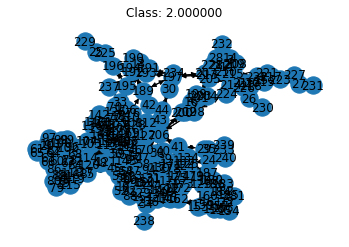

In [21]:
graph = trainset[14]
label=labels[14][0]

fig, ax = plt.subplots()
G=graph.to_networkx()
pos=nx.spring_layout(G)
nx.draw(G,pos)
nx.draw_networkx_labels(G,pos, ax=ax)
ax.set_title('Class: {:f}'.format(label))
plt.show()

### Apply random shuffle to training set

In [22]:
##apply random shuffle on the trainset
np.random.seed(0)
randomize = np.arange(len(trainset))
np.random.shuffle(randomize)
labels_shuffled=[]
trainset_shuffled=[]
for i in range (len(randomize)):
    labels_shuffled.append(labels[randomize[i]])
    trainset_shuffled.append(trainset[randomize[i]])

In [23]:
import dgl

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

### Net Definition

In [9]:
class Net(torch.nn.Module):
    def __init__(self,in_dim, hidden_dim, n_classes):
        super(Net, self).__init__()
#         self.lin = Sequential(Linear(10, 10))
        self.conv1 = GCNConv(in_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, x, edge_index):
        h1 = F.relu(self.conv1(x, edge_index))
#         h2 = F.dropout(h1, training=self.training)
        h3 = F.relu(self.conv2(h1, edge_index))
        y = torch.mean(h3, 0, True)
        return self.classify(y)

### Setup and training

In [40]:
import torch.optim as optim
from torch.utils.data import DataLoader

### Make Training Results Deterministic

In [41]:
# import torch
# torch.manual_seed(0)
# #CuDNN:
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

## Set Training Epoch

In [42]:
training_epoch = 500 #original = 1500 for 1 training sample 500 for 20 samples
initial_lr = 0.001

model_name = 'explaingraph_epoch30005-May-2020-13:32:24'

# model_name = '4-class-model_10-samples_500-epoch_acc-99.500000_1-errs_12-Apr-2020-14:35:45'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# SAVE_PATH = './models/' + model_name
# model = Net(1, 256, 4).to(device)



# loss = checkpoint['loss']
print(device)
training='new' #{'new','continue',""}

cuda


Epoch 0, loss 1.4704
Epoch 1, loss 1.3849
Epoch 2, loss 1.3744
Epoch 3, loss 1.3713
Epoch 4, loss 1.3789
Epoch 5, loss 1.3660
Epoch 6, loss 1.3641
Epoch 7, loss 1.3788
Epoch 8, loss 1.3657
Epoch 9, loss 1.3706
Epoch 10, loss 1.3619
Epoch 11, loss 1.3580
Epoch 12, loss 1.3625
Epoch 13, loss 1.3578
Epoch 14, loss 1.3589
Epoch 15, loss 1.3573
Epoch 16, loss 1.3512
Epoch 17, loss 1.3497
Epoch 18, loss 1.3484
Epoch 19, loss 1.3488
Epoch 20, loss 1.3481
Epoch 21, loss 1.3449
Epoch 22, loss 1.3432
Epoch 23, loss 1.3427
Epoch 24, loss 1.3414
Epoch 25, loss 1.3405
Epoch 26, loss 1.3376
Epoch 27, loss 1.3400
Epoch 28, loss 1.3357
Epoch 29, loss 1.3324
Epoch 30, loss 1.3326
Epoch 31, loss 1.3296
Epoch 32, loss 1.3263
Epoch 33, loss 1.3266
Epoch 34, loss 1.3228
Epoch 35, loss 1.3201
Epoch 36, loss 1.3179
Epoch 37, loss 1.3147
Epoch 38, loss 1.3119
Epoch 39, loss 1.3086
Epoch 40, loss 1.3067
Epoch 41, loss 1.3025
Epoch 42, loss 1.2981
Epoch 43, loss 1.2948
Epoch 44, loss 1.2890
Epoch 45, loss 1.284

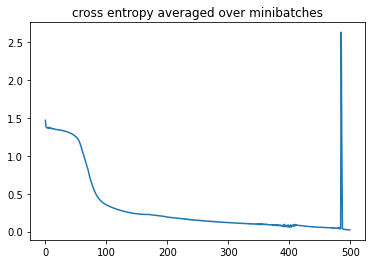

In [43]:
# Create model
#model = Classifier(1, 256, trainset.num_classes)
import time
from datetime import datetime
if (training=='new'):
    model = Net(1, 256, 4).to(device)
    loss_func = nn.CrossEntropyLoss()
    model.train()
    optimizer = optim.Adam(model.parameters(), lr = initial_lr)#,weight_decay=5e-4)
    epoch_losses = []
    #start timer:
    t0 = time.time()

    for epoch in range(training_epoch):
        model.train()
        epoch_loss = 0
        for iter, g in enumerate(trainset):
            x = g.in_degrees().view(-1, 1).float().to(device)

#             x = torch.ones(g.batch_num_nodes[0],1).cuda()
            a = g.edges()[0].tolist()
            b = g.edges()[1].tolist()
            edges = list(zip(a,b))
            edges = np.array(edges)
            edges = torch.LongTensor(edges.transpose()).to(device)
            label = labels[iter]

            prediction = model(x,edges)

            loss = loss_func(prediction, torch.LongTensor(label).cuda())
            optimizer.zero_grad()
            loss.backward()
    #         print('loss {:.4f},label:{}'.format(loss,label))
            optimizer.step()
            epoch_loss += loss.detach().item()
        epoch_loss /= (iter + 1)
        print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
        epoch_losses.append(epoch_loss)

    training_time = time.time() - t0

    print('Finished training. Training time = {:.4f} Seconds'.format(training_time))

    dateTimeObj = datetime.now()

    timestampStr = dateTimeObj.strftime("%d-%b-%Y-%H:%M:%S")
    model_name = '4_class_explaingraph_epoch{}'.format(training_epoch)+timestampStr

    SAVE_PATH = './models/' + model_name
    torch.save({'epoch':epoch,'model_state_dict':model.state_dict(),'optimizer_state_dict': optimizer.state_dict()}, SAVE_PATH)
    plt.title('cross entropy averaged over minibatches')
    plt.plot(epoch_losses)
    plt.show()
if(training=='continue'):
    checkpoint = torch.load(SAVE_PATH)
    checkpoint = torch.load(SAVE_PATH)
    start_epoch = checkpoint['epoch']
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    
    for epoch in range(training_epoch):
        epoch += start_epoch
        model.train()
        epoch_loss = 0
        for iter, g in enumerate(traindata):
            x = g.in_degrees().view(-1, 1).float().to(device)

#             x = torch.ones(g.batch_num_nodes[0],1).cuda()
            a = g.edges()[0].tolist()
            b = g.edges()[1].tolist()
            edges = list(zip(a,b))
            edges = np.array(edges)
            edges = torch.LongTensor(edges.transpose()).to(device)
            labels = labels_shuffled[iter]

            prediction = model(x,edges)
            
            loss = loss_func(prediction, torch.LongTensor(labels).cuda())
            
            optimizer.zero_grad()
            loss.backward()
    #         print('loss {:.4f},label:{}'.format(loss,label))
            optimizer.step()
            epoch_loss += loss.detach().item()
        epoch_loss /= (iter + 1)
        print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses.append(epoch_loss)
    torch.save({'epoch':epoch,'model_state_dict':model.state_dict(),'optimizer_state_dict': optimizer.state_dict()}, SAVE_PATH)
    plt.title('cross entropy averaged over minibatches')
    plt.plot(epoch_losses)
    plt.show()

### Finish Training

### Plot Loss

### Get Testset data

In [24]:
testset = []
test_labels = []
test_dir = dir

testing_idx_1=[]
testing_idx_2=[]
testing_idx_3=[]
testing_idx_4=[]
for i in test_idx:
    testing_idx_1.append(i)
    testing_idx_2.append(i)
    testing_idx_3.append(i)
    testing_idx_4.append(i)
print(test_idx)
# print(testing_idx_1)
# print(training_idx_1)
# print(testing_idx_2)
# print(training_idx_2)
# print(testing_idx_3)
# print(training_idx_3)
# print(testing_idx_4)
# print(training_idx_4)

[5, 6, 8, 10, 12, 15, 16, 17, 19, 20, 25, 28, 32, 33, 34, 38, 40, 41, 43, 46, 47, 49, 50, 51, 52, 55, 56, 60, 63, 64]


### Random Sample Nodes and Edges for Testing

## Set Percentage Keep

In [25]:
pct_keep = 1

In [26]:
for idx in range(len(testing_idx_1)):
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(testing_idx_1[idx])+"bit"+j+'.csv'
        filename2 = "cla_"+str(testing_idx_2[idx])+"bit"+j+'.csv'
        filename3 = "csa_"+str(testing_idx_3[idx])+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(testing_idx_4[idx])+"bit"+j+'.csv'
        
        if(filename.find("node_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        if(filename3.find("node_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    
    #randomly sample edges but keep all nodes
    
#     node_list_keep = random.sample(node_list,int(len(node_list)*pct_keep))
    node_list_keep = node_list
    edge_list_keep = random.sample(edge_list,int(len(edge_list)*pct_keep))
#     node_list2_keep = random.sample(node_list2,int(len(node_list2)*pct_keep))
    node_list2_keep = node_list2
    edge_list2_keep = random.sample(edge_list2,int(len(edge_list2)*pct_keep))
#     node_list3_keep = random.sample(node_list3,int(len(node_list3)*pct_keep))
    node_list3_keep = node_list3
    edge_list3_keep = random.sample(edge_list3,int(len(edge_list3)*pct_keep))
#     node_list4_keep = random.sample(node_list4,int(len(node_list4)*pct_keep))
    node_list4_keep = node_list4
    edge_list4_keep = random.sample(edge_list4,int(len(edge_list4)*pct_keep))
    
    #create dgl graph
    g=build_circuit_graph_undirected(node_list_keep,edge_list_keep)
    testset.append(g)
    test_labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2_keep,edge_list2_keep)
    testset.append(g2)
    test_labels.append(label_list2[0])
#     g3=build_circuit_graph_undirected(node_list3_keep,edge_list3_keep)
#     testset.append(g3)
#     test_labels.append(label_list3[0])
#     g4=build_circuit_graph_undirected(node_list4_keep,edge_list4_keep)
#     testset.append(g4)
#     test_labels.append(label_list4[0])

for i in test_labels:
    i[0] = int(i[0])

# print(test_labels)

In [27]:
##apply random shuffle on the testset    
np.random.seed(0)
randomize = np.arange(len(testset))
np.random.shuffle(randomize)
testset_shuffled=[]
test_labels_shuffled=[]
for i in range (len(randomize)):
    test_labels_shuffled.append(test_labels[randomize[i]])
    testset_shuffled.append(testset[randomize[i]])
print(testset_shuffled)

[DGLGraph(num_nodes=435, num_edges=1460,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=777, num_edges=2578,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=1237, num_edges=4076,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=448, num_edges=1504,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=263, num_edges=882,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=84, num_edges=272,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=539, num_edges=1812,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=838, num_edges=2824,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=617, num_edges=2076,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=370, num_edges=1240,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=110, num_edges=360,
         ndata_schemes

### Test on Testset

In [28]:
model.eval()

prediction=torch.zeros(len(testset),1,dtype=torch.float64)
for iter, g in enumerate(testset):
        x = g.in_degrees().view(-1, 1).float().cuda()
        a = g.edges()[0].tolist()
        b = g.edges()[1].tolist()
        edges = list(zip(a,b))
        edges = np.array(edges)
        edges = torch.LongTensor(edges.transpose()).cuda()
        label = test_labels[iter]

        pred = model(x,edges)
        probs_Y = torch.softmax(pred, 1)
        
        argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)
#         prediction[iter] = (argmax_Y.cuda()==label.cuda())

        prediction[iter] = (argmax_Y.item()==label[0])

        
print('Accuracy of argmax predictions on the test set: {:.4f}%'.format(
    (prediction.cuda().sum().item() / len(testset)) * 100))


Accuracy of argmax predictions on the test set: 100.0000%


## Finish Testing

## Get Error Items

In [29]:
error = (test_labels_shuffled != argmax_Y.float()).nonzero()
print('Total', len(error),'errors out of',len(test_idx)*4,'test data')
for i in error.cpu().numpy():
    error_idx= i[0]
    print(probs_Y[error_idx],test_labels_shuffled[error_idx])
#     print(i[0])

AttributeError: 'bool' object has no attribute 'nonzero'

## Load Model

In [30]:
# model_name = '4class_1Sample_97.580645_0411'

SAVE_PATH = 'models/4_class_explaingraph_epoch50007-May-2020-10:49:59'
model = Net(1, 256, 4)
checkpoint = torch.load(SAVE_PATH)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
start_epoch = checkpoint['epoch']

model.cuda()
model.eval()

Net(
  (conv1): GCNConv(1, 256)
  (conv2): GCNConv(256, 256)
  (classify): Linear(in_features=256, out_features=4, bias=True)
)

In [31]:
# (test_labels != argmax_Y.float()).nonzero()

## Visualize Activations

In [32]:
from math import sqrt

import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.nn import MessagePassing
from torch_geometric.data import Data
from torch_geometric.utils import k_hop_subgraph, to_networkx
def visualize(edge_index, edge_mask, y=None,
                           threshold=None,**kwargs):
        assert edge_mask.size(0) == edge_index.size(1)
        
        if threshold is not None:
            print('Edge Threshold:',threshold)
            edge_mask = (edge_mask >= threshold).to(torch.float)
          
        subset=[]
        edge_list=[]
        for index,mask in enumerate(edge_mask):
            node_a = edge_index[0,index]
            node_b = edge_index[1,index]
            if node_a not in subset:
                subset.append(node_a.cpu().item())
#                 print("add: {}".format(node_a))
            if node_b not in subset:
                subset.append(node_b.cpu().item())
#                 print("add: {}".format(node_b))
            if mask:
                edge_list.append((edge_index[0,index].cpu().item(),edge_index[1,index].cpu().item()))
#         print("edge_list to draw:",edge_list)
        
        
        if y is None:
            y = torch.zeros(edge_index.max().item() + 1,
                            device=edge_index.device)
        else:
            y = y[subset].to(torch.float) / y.max().item()
        
        data = Data(edge_index=edge_index.cpu(), att=edge_mask, y=y,
                    num_nodes=y.size(0)).to('cpu')

        G = to_networkx(data, node_attrs=['y'], edge_attrs=['att'])
#         mapping = {k: i for k, i in enumerate(subset.tolist())}
        mapping = {k: i for k, i in enumerate(subset)}
#         print(mapping)
#         G = nx.relabel_nodes(G, mapping)

        kwargs['with_labels'] = kwargs.get('with_labels') or True
        kwargs['font_size'] = kwargs.get('font_size') or 10
        kwargs['node_size'] = kwargs.get('node_size') or 200
        kwargs['cmap'] = kwargs.get('cmap') or 'cool'

        pos = nx.kamada_kawai_layout(G)
        ax = plt.figure(figsize=(20,10))
#         for source, target, data in G.edges(data=True):
#             ax.annotate(
#                 '', xy=pos[target], xycoords='data', xytext=pos[source],
#                 textcoords='data', arrowprops=dict(
#                     arrowstyle="-",
#                     alpha=max(data['att'], 0.1),
#                     shrinkA=sqrt(kwargs['node_size']) / 2.0,
#                     shrinkB=sqrt(kwargs['node_size']) / 2.0,
# #                     connectionstyle="arc3,rad=0.1",
#                 ))
# #         if node_feature_mask is not None:
        nx.draw_networkx_nodes(G, pos, **kwargs)
#         print("edge_index:",edge_index.cpu())
#         print("G.edges:",G.edges)
        color = np.array(edge_mask.cpu())
    
#         cmap = plt.get_cmap('gist_rainbow',color)
#         nx.draw(nx_G_undirected,pos,with_labels=False,node_size=500,font_size=14,node_color=node_type,cmap=cmap,vmin = vmin,vmax=vmax)
        
        nx.draw_networkx_edges(G, pos,edgelist=edge_list,
                       width=3, alpha=0.5)
        nx.draw_networkx_labels(G, pos, **kwargs)
        plt.axis('off')
        return plt


### Edge Reduction by SGA

In [33]:
from pygad import GA
EPS = 1e-15
edge_size = 0.5

def __graph_loss__(log_logits, pred_label,edge_mask):
        loss = -torch.log(log_logits[0,pred_label])
#         print(loss)
        edge_mask = torch.Tensor(edge_mask)
        m = edge_mask.sigmoid()
        loss = loss + edge_size * m.sum()

        ent = -m * torch.log(m + EPS) - (1 - m) * torch.log(1 - m+ EPS)
        loss = loss + m * ent.mean()

        return loss

In [34]:
import numpy as np
from bga import BGA

test_graph = testset[8]
test_label = test_labels[8]

print(test_label)

x = test_graph.in_degrees().view(-1, 1).float().cuda()
a = test_graph.edges()[0].tolist()
b = test_graph.edges()[1].tolist()
edges = list(zip(a,b))
edges = np.array(edges)
edges = torch.LongTensor(edges.transpose()).cuda()
probs_Y=model(x,edges)
probs_Y = torch.softmax(probs_Y, 1)
pred_label = probs_Y.argmax(dim=-1)
print("predicted label:",pred_label.item())
num_edges = len(test_graph.edges()[0])
print("num_edges:",num_edges)

def fitness_func(edge_mask):
    a = test_graph.edges()[0].tolist()
    b = test_graph.edges()[1].tolist()
    if(edge_mask.sum()==0):
        #eliminate trivial solution
        return 9999
    edge_list=[]
    for index, edge in enumerate(edge_mask):
        if edge:
            edge_list.append((a[index],b[index]))
    edges = np.array(edge_list)
    
    edges = torch.LongTensor(edges.transpose()).cuda()
    
    log_logits=model(x,edges)
    pred = torch.softmax(log_logits, 1)
    
    loss = __graph_loss__(pred, pred_label,edge_mask)
    return loss.cpu().detach().numpy()[0]
    
num_pop = 1000
problem_dimentions = num_edges

test = BGA(pop_shape=(num_pop, problem_dimentions), method=fitness_func, p_c=0.8, p_m=0.2, max_round = 10000, early_stop_rounds=None, verbose = None, maximum=False)

[1]
predicted label: 1
num_edges: 536


In [ ]:
best_solution, best_fitness,fitness_record = test.run()



generation:0, current_best_fit:247.60203552246094
generation:1, current_best_fit:244.9263916015625
generation:2, current_best_fit:242.94541931152344
generation:3, current_best_fit:242.94541931152344
generation:4, current_best_fit:242.67552185058594
generation:5, current_best_fit:241.30714416503906
generation:6, current_best_fit:239.34207153320312
generation:7, current_best_fit:234.7725830078125
generation:8, current_best_fit:234.7725830078125
generation:9, current_best_fit:232.20909118652344
generation:10, current_best_fit:232.20909118652344
generation:11, current_best_fit:232.20909118652344
generation:12, current_best_fit:230.982177734375
generation:13, current_best_fit:230.982177734375
generation:14, current_best_fit:230.47268676757812
generation:15, current_best_fit:230.47268676757812
generation:16, current_best_fit:229.84217834472656
generation:17, current_best_fit:227.9693145751953
generation:18, current_best_fit:227.9693145751953
generation:19, current_best_fit:227.3791961669922


In [ ]:
print(best_solution)
edge_mask = torch.LongTensor(best_solution)
plt = visualize(edge_index=edges, edge_mask=edge_mask,threshold=0.1)
plt.show()

In [ ]:
print(best_solution)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
nx_G_undirected = G_undirected.to_networkx()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G_undirected)
plt.figure(1,figsize=(12,12))
cmap = plt.get_cmap('gist_rainbow',len(gate_types)+2)
# cmap.set_under('gray')
vmin = 0
vmax = 37
nx.draw(nx_G_undirected,pos,with_labels=False,node_size=500,font_size=14,node_color=node_type,cmap=cmap,vmin = vmin,vmax=vmax)
# plt.savefig('c432_undirected.png')
nx.draw_networkx_labels(nx_G_undirected,pos,labels=gate_type_dict2)
cm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
cm._A = []
plt.colorbar(cm)